# Forcasting with LSTM on NGA time serie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path_1 = "../Data/test_st.csv"
path_2 = "../Data/extaction_missing_data.csv"

df = pd.read_csv(path_1)
#df2 = pd.read_csv(path_2) 

In [3]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
0,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
1,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
3,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
4,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
5699,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
5700,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
5701,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526
5702,2024-03-01 09:40:00,21136658,232710,0.50074,4.34932,4.110944,7.49714,3.75781


In [4]:
df2

,Unnamed: 0,value_created_at,measure_id,NGA,NGV,K,VCC_g,VC_g
0,0,2022-01-15 21:08:32,4055996,0.230,0.420,0.000000,0.000000,0.000000
1,1,2022-01-15 21:25:21,4056494,0.230,0.390,0.000000,0.000000,0.000000
2,2,2022-01-16 01:25:21,4059012,0.240,0.440,0.000000,0.000000,0.000000
3,3,2022-01-16 05:25:21,4061956,0.240,0.420,0.000000,0.000000,0.000000
4,4,2022-01-16 09:25:21,4064764,0.240,0.430,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
9729,9729,2024-08-12 22:57:28,28098744,0.413,0.471,4.117731,5.701956,2.880685
9730,9730,2024-08-13 00:57:28,28102034,0.410,0.500,4.170659,5.707357,3.037322
9731,9731,2024-08-13 02:57:28,28105174,0.418,0.508,4.137773,5.385080,2.833874
9732,9732,2024-08-13 04:57:28,28108468,0.415,0.532,4.069019,5.228443,2.776260


In [5]:
df.index = pd.to_datetime(df['value_created_at'])
df2.index = pd.to_datetime(df2['value_created_at'])

In [6]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
value_created_at,,,,,,,,
2023-06-24 15:05:48,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
2023-06-24 15:22:51,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2023-06-24 15:50:00,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
2023-06-24 15:55:00,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
2023-06-24 16:00:00,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
2024-03-01 06:40:00,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
2024-03-01 07:40:00,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
2024-03-01 08:40:00,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526


In [7]:
df2

,Unnamed: 0,value_created_at,measure_id,NGA,NGV,K,VCC_g,VC_g
value_created_at,,,,,,,,
2022-01-15 21:08:32,0,2022-01-15 21:08:32,4055996,0.230,0.420,0.000000,0.000000,0.000000
2022-01-15 21:25:21,1,2022-01-15 21:25:21,4056494,0.230,0.390,0.000000,0.000000,0.000000
2022-01-16 01:25:21,2,2022-01-16 01:25:21,4059012,0.240,0.440,0.000000,0.000000,0.000000
2022-01-16 05:25:21,3,2022-01-16 05:25:21,4061956,0.240,0.420,0.000000,0.000000,0.000000
2022-01-16 09:25:21,4,2022-01-16 09:25:21,4064764,0.240,0.430,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2024-08-12 22:57:28,9729,2024-08-12 22:57:28,28098744,0.413,0.471,4.117731,5.701956,2.880685
2024-08-13 00:57:28,9730,2024-08-13 00:57:28,28102034,0.410,0.500,4.170659,5.707357,3.037322
2024-08-13 02:57:28,9731,2024-08-13 02:57:28,28105174,0.418,0.508,4.137773,5.385080,2.833874


In [8]:
nga = df[['NGA']]
nga2 = df2[['NGA']]

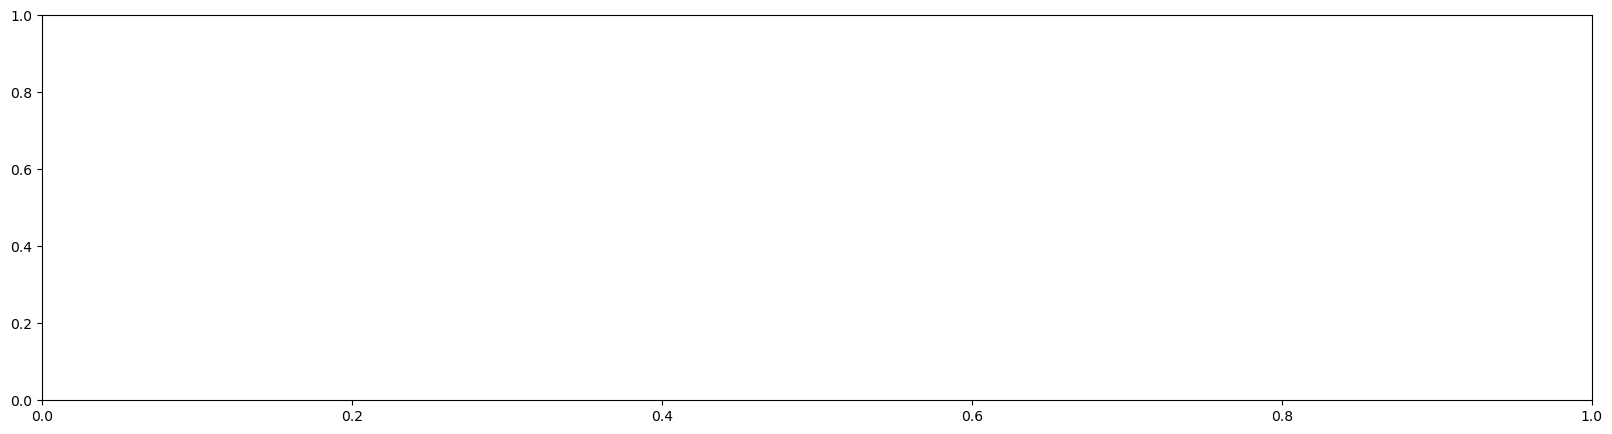

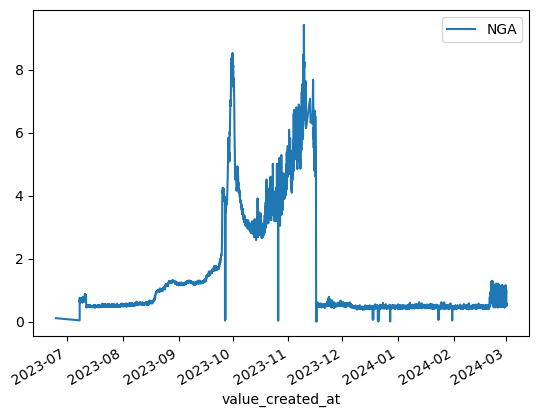

In [9]:
fig, ax = plt.subplots(figsize=(20, 5))
nga.plot();

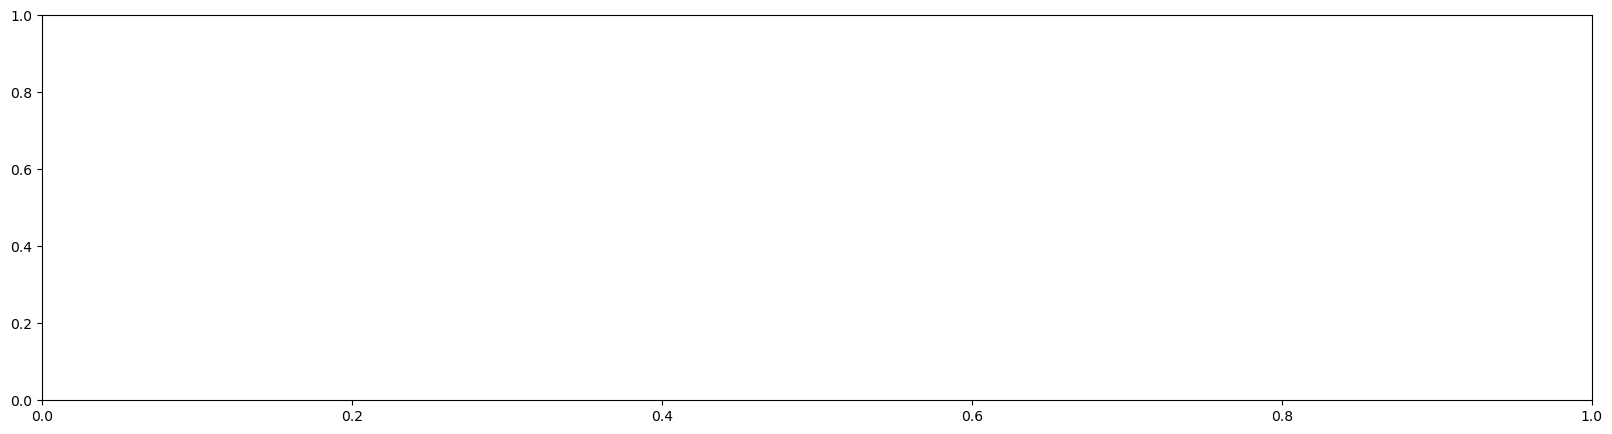

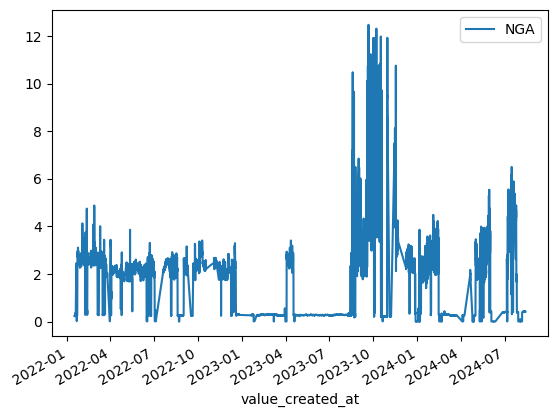

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))
nga2.plot();

In [11]:
from tensorflow.keras.models import load_model
model1 = load_model('model_nga_1h_2.keras')

In [12]:
prediction = model1.predict(nga.NGA.values[-382:].reshape((-1, 382, 1)))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


array([[0.4943184]], dtype=float32)

In [13]:
nga

,NGA
value_created_at,
2023-06-24 15:05:48,0.10832
2023-06-24 15:22:51,0.10783
2023-06-24 15:50:00,0.10815
2023-06-24 15:55:00,0.10708
2023-06-24 16:00:00,0.10750
...,...
2024-03-01 06:40:00,0.54927
2024-03-01 07:40:00,0.52915
2024-03-01 08:40:00,0.55540


In [14]:
last_timestamp = nga.index[-1]

new_timestamp = last_timestamp + pd.Timedelta(hours=1)

new_row = pd.DataFrame({'value_created_at': [new_timestamp], 'NGA': [22]})
new_row.set_index('value_created_at', inplace=True)
nga = pd.concat([nga, new_row], ignore_index=False)

nga

,NGA
value_created_at,
2023-06-24 15:05:48,0.10832
2023-06-24 15:22:51,0.10783
2023-06-24 15:50:00,0.10815
2023-06-24 15:55:00,0.10708
2023-06-24 16:00:00,0.10750
...,...
2024-03-01 07:40:00,0.52915
2024-03-01 08:40:00,0.55540
2024-03-01 09:40:00,0.50074


In [15]:
last_timestamp = nga.index[-1]

new_timestamp = last_timestamp + pd.Timedelta(hours=1)

new_row = pd.DataFrame({'value_created_at': [new_timestamp], 'NGA': [455]})
new_row.set_index('value_created_at', inplace=True)
nga = pd.concat([nga, new_row], ignore_index=False)

nga

,NGA
value_created_at,
2023-06-24 15:05:48,0.10832
2023-06-24 15:22:51,0.10783
2023-06-24 15:50:00,0.10815
2023-06-24 15:55:00,0.10708
2023-06-24 16:00:00,0.10750
...,...
2024-03-01 08:40:00,0.55540
2024-03-01 09:40:00,0.50074
2024-03-01 10:40:00,0.50810


In [16]:
nga.NGA.values[-382:].reshape((-1, 382, 1))

array([[[4.72850e-01],
        [4.55330e-01],
        [5.72630e-01],
        [4.83620e-01],
        [4.96770e-01],
        [4.37090e-01],
        [4.49090e-01],
        [4.48830e-01],
        [4.88570e-01],
        [5.23660e-01],
        [4.61210e-01],
        [5.25240e-01],
        [4.76100e-01],
        [4.67850e-01],
        [4.59720e-01],
        [4.96650e-01],
        [4.49260e-01],
        [4.82310e-01],
        [4.34910e-01],
        [4.83170e-01],
        [4.48070e-01],
        [4.81800e-01],
        [4.75400e-01],
        [4.40650e-01],
        [4.60640e-01],
        [4.68900e-01],
        [4.74300e-01],
        [4.55550e-01],
        [4.96990e-01],
        [4.37100e-01],
        [4.30430e-01],
        [4.88540e-01],
        [4.86390e-01],
        [5.22790e-01],
        [5.02200e-01],
        [4.71330e-01],
        [4.25910e-01],
        [4.26050e-01],
        [4.95950e-01],
        [4.54530e-01],
        [4.65130e-01],
        [4.77750e-01],
        [4.44910e-01],
        [5.

In [17]:
def run_model(df,periods = 1):
    df['value_created_at'] = pd.to_datetime(df['value_created_at'])
    df.set_index('value_created_at', inplace=True)
    nga = df[['NGA']]
    nga['set'] = 'actual'
    model1 = load_model('model_nga_1h_2.keras')
    for period in range(periods) :
        prediction = model1.predict(nga.NGA.values[-382:].reshape((-1,382,1)))
        last_timestamp = nga.index[-1]
        new_timestamp = last_timestamp + pd.Timedelta(hours=1)
        new_row = pd.DataFrame({'value_created_at': [new_timestamp], 'NGA': [prediction[0][0]]})
        new_row['set'] = 'predicted'
        new_row.set_index('value_created_at', inplace=True)
        nga = pd.concat([nga, new_row], ignore_index=False)
    return nga

In [18]:
df = pd.read_csv(path_1)
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
0,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
1,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
3,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
4,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
5699,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
5700,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
5701,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526
5702,2024-03-01 09:40:00,21136658,232710,0.50074,4.34932,4.110944,7.49714,3.75781


In [19]:
a = run_model(df, 24)

C:\Users\user\AppData\Local\Temp\ipykernel_10900\3957499944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nga['set'] = 'actual'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [20]:
a[a['set'] == 'predicted']

,NGA,set
value_created_at,,
2024-03-01 11:40:00,0.494318,predicted
2024-03-01 12:40:00,0.491305,predicted
2024-03-01 13:40:00,0.492217,predicted
2024-03-01 14:40:00,0.492797,predicted
2024-03-01 15:40:00,0.495466,predicted
2024-03-01 16:40:00,0.496538,predicted
2024-03-01 17:40:00,0.496815,predicted
2024-03-01 18:40:00,0.496839,predicted
2024-03-01 19:40:00,0.496785,predicted
